# Overview of Feature Selection Methods available in scikit-learn

## Introduction

In this tutorial, we will see select methods for feature selection using scikit-learn library. Feature Selection is the process of selecting the most relevant features based on various constraints that would contribute most to the output we are interested in. Having a good set of features can improve the accuracy of models manifold, especially when the dataset is large. Feature Selection is one of the important jobs while approaching a machine learning problem. The classifiers you write will be only as good as the features you provide. 


The process of feature selection enables one to think like a classifier. What data is useful to me to classify the input set? We can dump any unuseful data. Another point to keep in mind is to use independent features that give you different types of information about the data.Remove highly correlated data as they may lead to overfitting the model and hurt the accuracy.

<img src ="http://3.bp.blogspot.com/-Awzj2haNuko/UMkonIL1c5I/AAAAAAAAATw/6ayxi-F15d4/s1600/feature_selection.png">


Source : http://3.bp.blogspot.com/-Awzj2haNuko/UMkonIL1c5I/AAAAAAAAATw/6ayxi-F15d4/s1600/feature_selection.png









Topics Covered:
   In this tutorial, we will see a few methods to preform feature selection in Python, specifically using scikit-learn library. While Feature Extraction or Feature Engineering is a very intricate task in itself, we will not be focusing on how to engineer features in this tutorial. We will review few ways of selecting features in a given dataset and the ideology behind it. 
   
We will cover the following topics in this tutorial:
-  [Installing the libraries](#Installing-the-libraries)
-  [Univariate Feature Selection](#Univariate-Feature-Selection)
-  [Recursive Feature Elimination](#Recursive-Feature-Elimination)
-  [Feature Selection Using SelectFromModel and LassoCV](#Feature-Selection-Using-SelectFromModel-and-LassoCV)
-  [Removing Features with Low Variance using VarianceThreshold](#Removing-Features-with-Low-Variance-using-VarianceThreshold)
-  [Example Demonstration](#Example-Demonstration)

In all of my examples, I use a regression dataset but most of them are applicable on a classification dataset as well.For demonstration purposes, we will be using the Iris dataset or the Boston Housing Dataset. Finally, an example using the Vehicle Data Set with the Features we added as a part of HW3 will be used to demonstrate a few methods discussed. 

## Installing the libraries

Scikit-learn requires:
- Python (>= 2.7 or >= 3.3),
- NumPy (>= 1.8.2),
- SciPy (>= 0.13.3).

Using pip: 
pip install -U scikit-learn

or conda:

conda install scikit-learn

If you have Anaconda already installed, you do not need to perform the above step. A recent version of scikit-learn gets installed during the installation of Anaconda. After installation, please ensure the following code works for you.

In [18]:
import numpy as np
import pandas as pd


from sklearn.feature_selection import VarianceThreshold
import sklearn.datasets as datasets
from sklearn.feature_selection import SelectPercentile,f_classif, f_regression,SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
 

## Univariate Feature Selection
    
This method is widely used for understanding the data better. This will not necessarily help better your generalization but will give you a fair idea of how the features are correlated to the target variable.
    
Scikit-learn provides f_regression method for computing the p-values.It takes one input variable and one output variable at a time and calculates the correlation in the form of p-values(also f-values).Lower p-value means that the correlation is strong, hence (generally) not a good feature to be included in your model and high p-value means that the correlation is purely due to chance.For classification,a good test is the Chi-square test.It is intended to test how likely it is that an observed distribution is due to chance. 

SciKit-learn provides feature selection classes whose objects has a transform method:
- SelectKBest - keeps only those features that recevie the top k scores.
- SelectPercentile -keeps only those features that score highest percentage of features
- GenericUnivariateSelect -This is a configurable routine that takes in the mode,a number for modes that needs a parameter and a score function as parameters.

These functions help with univariate statistics on each feature:
 
- SelectFwe -used to select based on Family-wise Error
- SelectFdr -used to select based on False Discovery Rate
- SelectFpr -used to select based on False Positive Rate

We will see an example of SelectPercentile using f_classif as the scoring function. 


In [4]:
iris = datasets.load_iris()
#intiial size of the independent variables
print("Original feature vector shape:%s "  %str(iris.data.shape))

# creating 20 columns of noise
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

# Add the noisy data to the exisitng features
X = np.hstack((iris.data, E))

print("After introducing noise data, shape:%s "  %str(X.shape))

#response variable y
y = iris.target 


# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_regression, percentile=10)
fitted =selector.fit(X, y)
new_set =selector.transform(X)
print("After performing feature selection, shape:%s "  %str(new_set.shape))


 


Original feature vector shape:(150, 4) 
After introducing noise data, shape:(150, 24) 
After performing feature selection, shape:(150, 3) 


This above example demonstrates how the features have been removed with the SelectPercentile function with regression based on f distributon.We will see the scores of all the 24 features below:

In [5]:
#prints the scores of each feature fed as X
print(selector.scores_)
 
#After fitting, the values of the input variable array
print(new_set[:5])

[  2.33838996e+02   3.15975083e+01   1.34215919e+03   1.58955920e+03
   1.76919703e+00   3.27990967e-02   5.58612793e+00   5.18552784e-01
   8.24292783e-01   2.00030571e+00   3.38748966e-01   1.08472512e-01
   1.81513098e+00   2.82386345e-01   2.11526376e-02   5.76839730e-01
   8.05795666e-02   2.89174233e+00   1.83049454e-01   2.72182330e-01
   2.79699763e-01   5.68928128e-02   5.25167697e-01   3.94660844e-01]
[[ 5.1  1.4  0.2]
 [ 4.9  1.4  0.2]
 [ 4.7  1.3  0.2]
 [ 4.6  1.5  0.2]
 [ 5.   1.4  0.2]]


## Recursive Feature Elimination

The methodology is Recursive Feature Elimination(RFE) which, as the name suggests, recursively removes features based on the given set of rules and   a supervised learning estimator with fit method . The estimator is first trained on the dataset and weights are assigned to each feature. Recursively, those features that have the smallest weights are eliminated.We can specify the number of features to be removed at each iteration. The importance of each feature is obtained either through a coefficient of the features in the decision function or through a feature_importances_attribute.
 
Recursive Feature Elimination with Cross Validation provides support for feature ranking and cross-validated selection of the best number of features.The fold can be specified as a parameter. It will recursively eliminate features untill it reaches the best cross validation score.

In [6]:
iris=datasets.load_iris()
X=iris.data
y=iris.target
names=iris.feature_names
names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
estimator=LinearSVC()
m = RFECV(estimator=estimator,cv=3)
m.fit(X,y)
print("Score of the feature selection model:%s"%m.score(X,y))
print("\nOptimal number of features %s"%m.n_features_)
print("\nArray indicating the features selected. True if the feature is retained and False if eliminated: \n%s"%m.support_)
print("\nRanking:\n %s"%m.ranking_)
print("\nThe cross-validation scores such that grid_scores_[i] corresponds to the CV score of the i-th subset of features. \n%s"%m.grid_scores_) 
# for x,y in zip(names, m.estimator_.coef_):
#     print(x,y)
print("\nThere are 3 classes and 4 features. Below are the weights assigned by the estimator for each feature against each class")
print("\nIris Plant classes:"+"\nIris Setosa\nIris Versicolour\nIris Virginica")
print("Features: \n" +str(names)+ "\n")
print(m.estimator_.coef_)

Score of the feature selection model:0.966666666667

Optimal number of features 4

Array indicating the features selected. True if the feature is retained and False if eliminated: 
[ True  True  True  True]

Ranking:
 [1 1 1 1]

The cross-validation scores such that grid_scores_[i] corresponds to the CV score of the i-th subset of features. 
[ 0.91421569  0.94689542  0.95383987  0.96691176]

There are 3 classes and 4 features. Below are the weights assigned by the estimator for each feature against each class

Iris Plant classes:
Iris Setosa
Iris Versicolour
Iris Virginica
Features: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

[[ 0.18423394  0.45122265 -0.80794137 -0.45071277]
 [ 0.05318082 -0.8913984   0.40302358 -0.9365123 ]
 [-0.85076916 -0.9864955   1.38091588  1.86543944]]


In [8]:
m.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Feature Selection Using SelectFromModel and LassoCV

Meta-transformer for selecting features based on importance weights.An important parameter of SelectFromModel function is the "threshold" parameter. The threshold is either a string or a float value. Those features whose value is below the threshold are removed. The threshold  may be a string {"median","mean"}. Float multiples can also be given, which can be used for scaling purposes, eg. "1.25*mean".

If you are not giving a threshold,the mean is used. If threshold is not passed but the estimator has a penalty set to l1,the threshold used is 1e-5. For example, LassoCV is linear regression with l1 penalty. If used, without passing a threshold valie, the threshold is set to 1e-5.

We will see an example with SelectFromModel and LassoCV

Here is a quick look at the Boston House Prices dataset:


In [9]:
dataset = datasets.load_boston()
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()
   
    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Number of features before feature selection: 13

No of features after fitting using selectFromModel: 10


Reducing the number of features to 2 by increasing the threshold iteratively:


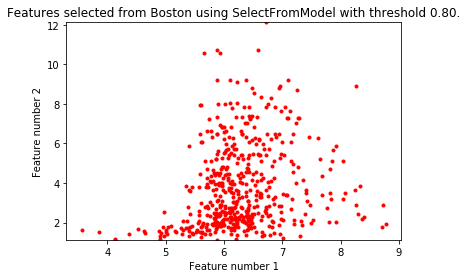

In [11]:
y=df.target
X=df.drop('target',1)
print("Number of features before feature selection: %s"%X.shape[1])

m = SelectFromModel(LassoCV())

m.fit(X, y)

n_features = m.transform(X).shape[1]

print("\nNo of features after fitting using selectFromModel: %d" % n_features)

#setting the threshold for plotting purposes
m.threshold=10 ** -5
 
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the meta-transformer.

print("\n\nReducing the number of features to 2 by increasing the threshold iteratively:")
while n_features > 2:
    m.threshold += 0.1
    X_transform = m.transform(X)
    n_features = X_transform.shape[1]
    
    
# Plot the selected two features from X.
plt.title("Features selected from Boston using SelectFromModel with threshold %0.2f." % m.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]

#Plotting feature 1 as the input against feature 2 output
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()



# Removing Features with Low Variance using VarianceThreshold


A simple way of removing features from a dataset is to specify a variance threshold and removing everything that is below the threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [12]:
boston= datasets.load_boston() 
X=boston.data
y=boston.target

#Define the feature selector with threshold
sel = VarianceThreshold(threshold=(.2 * (1 - .2)))

#Fit and Transform
sel.fit(X)
sel.transform(X)
print("The following are the variances of the original feature vector: \n")
print(sel.variances_)

#An index that selects the retained features from a feature vector. 
#If indices is False, this is a boolean array of shape [# input features],
#in which an element is True iff its corresponding feature is selected for retention. If indices is True, 
#this is an integer array of shape [# output features] whose values are indices into the input feature vector.
print("\n Printing the support array. True indicates the feature is included and False indicates the "
      "feature is not retained:\n")
print(sel.get_support())

The following are the variances of the original feature vector: 

[  7.37586143e+01   5.42861840e+02   4.69714297e+01   6.43854770e-02
   1.34010989e-02   4.92695216e-01   7.90792473e+02   4.42525226e+00
   7.56665313e+01   2.83486236e+04   4.67772630e+00   8.31828042e+03
   5.08939794e+01]

 Printing the support array. True indicates the feature is included and False indicates the feature is not retained:

[ True  True  True False False  True  True  True  True  True  True  True
  True]


# Example Demonstration

In this section we will look at some of the above methods implemented for the Vehicle Data Frame(vdf) produced in homework 3.

In [13]:
from sklearn.linear_model import LinearRegression

In [ ]:
vdf = pd.read_csv("vdf12.csv")
vdf.columns
vdf.head()
y=vdf['eta']
X=vdf.drop('eta',1) 
#Using Linear Support Vector Classification as the estimator 
m = SelectFromModel(LinearSVC(C=0.01, penalty='l1', dual=False))
m.fit(X, y)
new_X=m.transform(X)
n_features =new_X.shape[1]


In [22]:
print(m.get_support())

[ True False  True  True  True False  True False False False False False
 False  True False  True False False False False False  True  True  True]


All features are selected when the estimator is a classifier. We know there cannot be class memberships in this dataset. We use Linear Regression as a estimator in the following example and find out which features were eliminated.

In [15]:
vdf = pd.read_csv("vdf12.csv")
vdf.columns
vdf.head()
y=vdf['eta']
X=vdf.drop('eta',1)
lr = LinearRegression(normalize=True)
m = SelectFromModel(lr)
m.fit(X, y)
new_X=m.transform(X)
n_features =new_X.shape[1]
print("Number of features selected:%d" %n_features + "\n")
new_X[:2]
# print(m.get_support())
# print(X.columns)
for x,y in zip(list(X.columns),m.get_support()):
   
    if(y==False):
        print(x + " has been eliminated\n")
    else:
        print(x + " has been selected\n")


Number of features selected:10

pdist has been eliminated

spd has been eliminated

lat has been eliminated

lon has been eliminated

bias has been eliminated

sin_hdg has been eliminated

cos_hdg has been eliminated

sin_day_of_week has been eliminated

cos_day_of_week has been eliminated

sin_hour_of_day has been eliminated

cos_hour_of_day has been eliminated

sin_time_of_day has been eliminated

cos_time_of_day has been eliminated

weekday has been eliminated

Braddock  has been selected

Downtown has been selected

Greenfield Only has been selected

McKeesport  has been selected

Murray-Waterfront has been selected

Swissvale has been selected

61A has been selected

61B has been selected

61C has been selected

61D has been selected



In [16]:
print("The threshold of elimination is:%d " %m.threshold_)
print("Coeffecient of determination of the linear regression model for each feature:\n" + str(m.estimator_.coef_))

The threshold of elimination is:11991409907391 
Coeffecient of determination of the linear regression model for each feature:
[ -7.97209554e-04  -3.08965235e-02   9.21567243e+01  -2.31550442e+01
  -1.15746689e+12   4.82981759e-01  -5.87753431e-01   4.85866179e-01
  -1.16607934e-01   2.56513171e+00  -3.11938922e-01  -2.65402556e+00
  -7.87712798e-01   1.05836074e+00  -3.63033749e+13  -3.63033749e+13
  -3.63033749e+13  -3.63033749e+13  -3.63033749e+13  -3.63033749e+13
   1.72040304e+13   1.72040304e+13   1.72040304e+13   1.72040304e+13]


Interestingly, only those columns that are binary indicators of the route and destination were selected using the above model. R squared value of these columns where higher than the threshold. 
Let us examine the use of a Univariate Method using  f_regression. Univariate methods are most useful to regress each input against the output and get a better understanding of the dataset.

In [19]:
from sklearn.preprocessing import normalize
y=vdf['eta']
X=vdf.drop('eta',1)
X=normalize(X)
#By Default uses 10 best features based on the f statistic
m=SelectKBest(f_regression)
m.fit(X,y)
m.transform(X)
m.scores_

array([  1.05792308e+04,   2.72499367e+03,   1.97052988e+04,
         1.97030195e+04,   1.97144615e+04,   1.18276301e+03,
         7.90666359e+03,   2.05607309e+01,   1.25284031e+03,
         1.51101663e+02,   4.02071321e+03,   1.96252312e+01,
         4.07588700e+03,   1.55899087e+04,   6.07763141e+01,
         2.27921169e+04,   1.05281735e+02,   7.17238874e+01,
         6.00360629e+01,   3.80777881e+01,   1.22410896e+03,
         4.85682997e+03,   5.60049393e+03,   4.32455805e+03])

In [20]:
#Reference https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
vdf=vdf.drop('eta',axis=1)
feature_names = list(vdf.columns.values)
mask = m.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
print(new_features)

['pdist', 'lat', 'lon', 'bias', 'cos_hdg', 'weekday', 'Downtown', '61B', '61C', '61D']


Summary and References:
This tutorial demonstrates few combinations of the feature selection models and regressor classifiers and important attributes that these functions exposes. Following links and user guide were helpful in learning these methods:

1. scikit-learn user guide : http://scikit-learn.org/stable/_downloads/scikit-learn-docs.pdf 
2. Selecting good features – Part IV : http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/ 
3. Feature Selection: https://github.com/knathanieltucker/bit-of-data-science-and-scikit-learn/blob/master/notebooks/FeatureSelection.ipynb
4. Official Documentation:http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection 
5. Reference https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le


Scikit-Learn citation:
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html